In [1]:
import numpy as np
import pandas as pd
import openturns as ot
from matplotlib import cm
from matplotlib import pyplot as plt
from bancs import BANCS, DrawFunctions

In [2]:
from matplotlib import rc, rcParams, style
#style.use('default')
rcParams['text.usetex'] = True
#rcParams['text.latex.unicode'] = True
rc('font', **{'family': 'Times'})
rc('text', usetex=True)
rc('font', size=16)# Set the default text font size
rc('axes', titlesize=20)# Set the axes title font size
rc('axes', labelsize=16)# Set the axes labels font size
rc('xtick', labelsize=14)# Set the font size for x tick labels
rc('ytick', labelsize=16)# Set the font size for y tick labels
rc('legend', fontsize=16)# Set the legend font size

## Parabolic 2 reliability problem

In [3]:
g = ot.SymbolicFunction(["x1", "x2"], ["(x1 - x2) ^ 2 - 8 * (x1 + x2 - 5)"])

In [4]:
#X = ot.ComposedDistribution([ot.Normal(0., 0.5)] * 2, ot.ClaytonCopula(2.))
X = ot.ComposedDistribution([ot.Normal(0., 1.)] * 2)
Y = ot.CompositeRandomVector(g, ot.RandomVector(X))
threshold = 0.
failure_event = ot.ThresholdEvent(Y, ot.LessOrEqual(), threshold)
# Reference computed using CMC with subset size N=1e7
pf_ref = 0.0001315399999999369

In [5]:
#initialNumberOfCall = g.getEvaluationCallsNumber()
#Nref = int(1e7)
#experiment = ot.MonteCarloExperiment()
#algoMC = ot.ProbabilitySimulationAlgorithm(failure_event, experiment)
#algoMC.setMaximumCoefficientOfVariation(0.001)
#algoMC.setMaximumOuterSampling(Nref)
#algoMC.setBlockSize(10)
#algoMC.run()
#numberOfFunctionEvaluations = (g.getEvaluationCallsNumber() - initialNumberOfCall)
#print("{:.3e}".format(numberOfFunctionEvaluations))
#print(algoMC.getResult().getProbabilityEstimate())

## BACS : Bernstein Adaptive Conditional Sampling

In [6]:
import matplotlib as mpl
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
greys = mpl.colormaps['Greys_r']
faded_greys = ListedColormap(greys(np.linspace(0.4, 1, 128)))

In [8]:
pf

0.00014770000000000004

Quantiles = [27.06038532 14.64123751  5.99643901 -1.05878911]
Proba EBC = 1.48e-04
Relative error = 12.29%


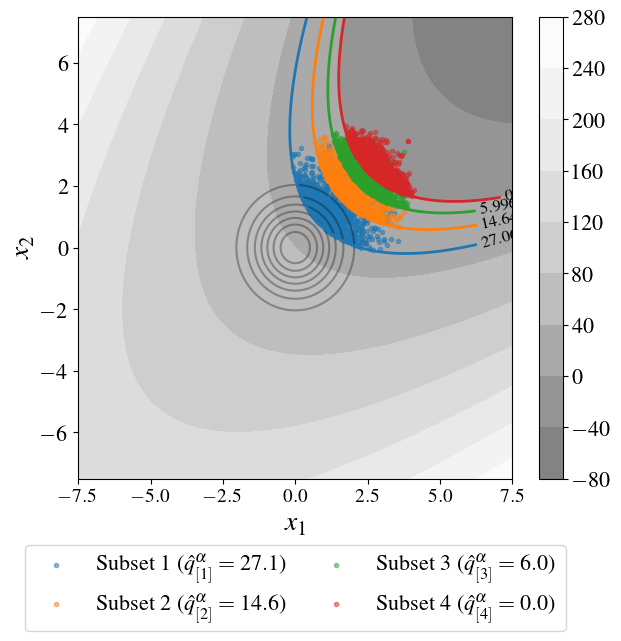

In [7]:
N = int(1e4)
bacs = BANCS(failure_event, N=N, M=20, p0=0.1)
quantiles = bacs.run()
pf = bacs.compute_pf()
print("Quantiles =", quantiles)
print("Proba EBC = {:.2e}".format(pf))
print("Relative error = {:.2%}".format(np.abs(pf - pf_ref) / pf_ref))
fig = bacs.draw_2D_BACS(colorbar=faded_greys)
plt.savefig("figures/bancs_parabolic2.pdf", bbox_inches='tight')
plt.savefig("figures/bancs_parabolic2.jpg", bbox_inches='tight', dpi=300);